In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\HP\\python\\Devanagiri'

In [1]:
#path to train data
train_path = 'F:\\Library\\Analytics Path\\Practice\\Devanagari CNN\\DevanagariHandwrittenCharacterDataset\\Train'

In [2]:
#path to test data
test_path = 'F:\\Library\\Analytics Path\\Practice\\Devanagari CNN\\DevanagariHandwrittenCharacterDataset\\Test'

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#Creating a generator that generates data from specified path, rescaling is normalizing the pixel values
train_generator = ImageDataGenerator(rescale = 1.0/255).flow_from_directory(train_path,target_size = (32,32),batch_size = 78200,color_mode = 'grayscale')

Found 78200 images belonging to 46 classes.


In [6]:
#Dumping data onto X_train and y_train
X_train,y_train = next(train_generator)

In [7]:
X_train.shape

(78200, 32, 32, 1)

In [8]:
y_train.shape

(78200, 46)

In [9]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
test_generator = ImageDataGenerator(rescale = 1.0/255).flow_from_directory(test_path,target_size = (32,32),batch_size = 13800,color_mode = 'grayscale')

Found 13800 images belonging to 46 classes.


In [11]:
X_test,y_test = next(test_generator)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense

In [13]:
del model

NameError: name 'model' is not defined

In [14]:
#Building a CNN
model = Sequential()

In [15]:
#Conv2D->MaxPooling2D->Conv2D->MaxPooling2D->Flatten->Hidden Layer(512 neurons)->Output layer
model.add(Conv2D(32,(5,5),input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(46,activation = 'softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',\
              optimizer='adam',\
              metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,batch_size = 32,epochs = 10,validation_data = (X_test,y_test))

Train on 78200 samples, validate on 13800 samples
Epoch 1/10
78200/78200 [==============================] - 190s 2ms/step - loss: 0.7378 - acc: 0.7854 - val_loss: 0.1647 - val_acc: 0.9505
Epoch 2/10
78200/78200 [==============================] - 186s 2ms/step - loss: 0.2726 - acc: 0.9153 - val_loss: 0.1077 - val_acc: 0.9675
Epoch 3/10
78200/78200 [==============================] - 194s 2ms/step - loss: 0.2046 - acc: 0.9362 - val_loss: 0.0797 - val_acc: 0.9769
Epoch 4/10
78200/78200 [==============================] - 197s 3ms/step - loss: 0.1690 - acc: 0.9456 - val_loss: 0.0733 - val_acc: 0.9773
Epoch 5/10
78200/78200 [==============================] - 185s 2ms/step - loss: 0.1462 - acc: 0.9539 - val_loss: 0.0719 - val_acc: 0.9788
Epoch 6/10
78200/78200 [==============================] - 152s 2ms/step - loss: 0.1346 - acc: 0.9574 - val_loss: 0.0679 - val_acc: 0.9797
Epoch 7/10
78200/78200 [==============================] - 152s 2ms/step - loss: 0.1201 - acc: 0.9613 - val_loss: 0.0562 - 

In [34]:
acc = model.history.history['acc']

In [35]:
val_acc = model.history.history['val_acc']

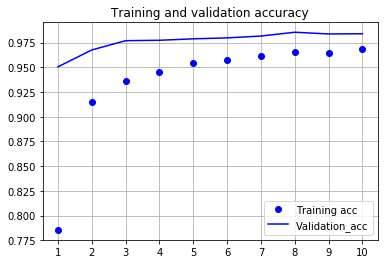

In [43]:
epochs = range(1,11)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation_acc')
plt.legend()
plt.xticks(range(1,11))
plt.grid()
plt.title('Training and validation accuracy')
plt.show()

In [ ]:
#Since accuracy on both training and validation data is
#increasing with epochs, no problem of overfitting

In [49]:
#predicting on test data
preds = model.predict(X_test)

In [50]:
preds.shape

(13800, 46)

In [51]:
preds[0]

array([1.4736198e-11, 9.6911053e-13, 1.1021004e-10, 1.3900519e-12,
       7.8320288e-11, 6.3125487e-13, 2.6825338e-13, 1.6581562e-06,
       1.0295920e-12, 1.0062757e-05, 1.8091343e-13, 1.8641826e-09,
       1.5123224e-11, 1.1474219e-15, 7.1987012e-09, 2.9649849e-11,
       1.6275596e-14, 4.2756636e-08, 1.2943002e-08, 2.2941449e-11,
       1.6100847e-07, 3.4808980e-13, 5.0364521e-09, 4.8332805e-14,
       2.3501789e-12, 5.3766588e-12, 1.6444128e-10, 2.6349276e-09,
       4.0802361e-10, 2.3556654e-10, 9.3736007e-06, 1.3203189e-12,
       9.9997866e-01, 9.8034680e-10, 2.3793545e-10, 2.8640501e-14,
       2.5405317e-10, 2.3008998e-13, 8.8057446e-09, 3.2856717e-11,
       8.2815252e-14, 3.3990330e-12, 1.6201256e-11, 1.2199087e-11,
       5.5335646e-15, 5.0803892e-13], dtype=float32)

In [52]:
#Converting predictions into 0 and 1 with a cut-off of 0.5
for i in range(13800):
    for j in range(46):
        if preds[i][j]>=0.5:
            preds[i][j] = 1
        else:
            preds[i][j] = 0

In [53]:
preds[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
#accuracy of our model on test data
accuracy_score(preds,y_test)

0.983768115942029